## 소현 point
* 수업 시간에 배운 chart 를 좀 여러 가지 그려보고자 함. 궁금한 것들 정리해보고, 각각을 잘 보여줄 수 있는 chart 형식을 생각해보면서, 골고루 실습해보고자했음.
* 하지만, 데이터가 '손님수'가 아닌 '비율'로 나와있어 '평균', '75%' 와 같은 통계값을 구하는 것이 큰 의미가 없을 것 같아서 box plot은 어려워보였음.
* line chart의 경우에도, '변화'를 나타내기에 최적화된 chart인데 이번에 다루는 데이터는 2020년 데이터만 가지고 하는 것이라서 부적합하지않나 생각
* histogram의 경우 그나마 '범위'를 나누어 살펴볼 수 있는 것이 '매출액' 혹은 '연령대'라고 생각했음. 하지만 이것도 사실 x축 값이 다양해서 그걸 hist 속성으로 bin 개수를 조정하며 histogram을 그릴 수 있는 것이 아니라 이미 매출액이 '5천만원' 단위로 구획되어있는 상태에서 그래프를 그리는거라 bar 그래프가 더 적합할 것 같음. 

# data 불러오기, 사용할 라이브러리 import

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer.csv', encoding='cp949')

# 연령대별 외식업체 이용 비율

* 20-30대가 가장 약속이 많은 연령대라고 생각해서 외식 업체 방문 비율도 높을 것이라고 생각했는데 20대는 의외로 비율이 적게 나타났고, 40,50대의 비율이 높은 점이 특이
* 이유 생각해봤을 때, 내가 20대라 '외식'이 거의 개인 약속으로 인해 발생한다고 생각했는데, 직장인들이야말로 매일같이 밖에서 식사를 하니까 이런 결과 나온게 아닐까 생각
* 가장 기본적인 걸 분석한 거라서 결과보다는, pie chart 만들 때에 지정가능한 많은 옵션들을 찾아보면서 추가해봤음. 
* 10, 20대가 좀 적은 이유는 경제력이 영향 주지 않았을까 생각, 그리고 고령층은 건강이나 그런 이유가 영향 줬을 듯. 

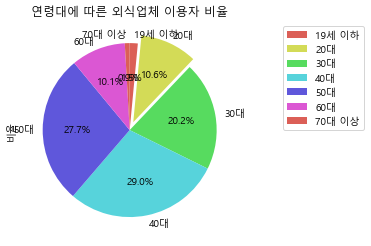

In [3]:
# 연령대별 외식업체 이용 비율

total_age = df.iloc[1:3,4:11]
total_age = total_age.transpose()
total_age.columns = ['연령대', '비율']
total_age.index = total_age['연령대']
total_age.drop('연령대', axis='columns', inplace=True)
total_age = total_age.astype('float')

plt.rc('font', family='Malgun Gothic') # 한글 폰트 안깨지게 하기 위해서 폰트 설정
total_age.plot(kind='pie', y='비율', title='연령대에 따른 외식업체 이용자 비율'
               , explode=(0,0.1,0,0,0,0,0) # 우리가 속한 20대에 돌출효과
               , autopct='%.1f%%'  # 비율값 표현되게 하기 위함(소숫점 둘째자리에서 반올림)
               , startangle=90, counterclock=False # 90도에서 시작해서 시계방향으로 돌아가며 나오게 하기 위함.
               , colors = sns.color_palette('hls'))  # 다음 시간에 배울 seaborn 라이브러리에서 색상 가져올 수 있음.
plt.legend(bbox_to_anchor=(1.6,1))  # 범례가 그래프랑 겹쳐보여서 위치 그래프 밖으로 설정


# 성별에 따른 외식업체 이용 비율

* 남성이 54.6%, 여성이 45.4% 로 나타남.
* 이것도 사실 처음에는 막연히 '친목'을 위한 외식이 대부분일것이라고 생각하고 있었어서 뭔가 여자들이 더 그런 약속이 잦은만큼 외식비율도 높지 않을까 예상함.
* 하지만 실제 결과로는 남자가 10% 가까이 더 높게 나타났고, 이유를 생각해보았을 때 이것또한 '직장인'들의 점심식사, 회식 등을 고려하면 남성 직장인의 수가 더 많은지 데이터를 보지 못해 모르지만, 그렇다면 이것이 영향을 줬을 듯함.
* 1인가구 비율이 높은 20~30대에서 남자 자취생들이 약간 여자에 비해서 더 귀찮아서 나가서 먹으려는 의향 있으니까 그래서 남자가 좀더 높게 나타난 데에 기여하지 않을까 하는 남자 자취생의 생각!

<AxesSubplot:title={'center':'성별에 따른 외식업체 이용자 비율'}, ylabel='비율'>

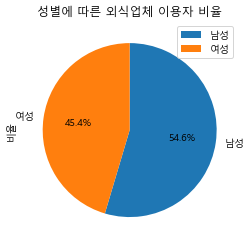

In [4]:
# 성별에 따른 외식업체 이용 비율
total_gender = df.iloc[1:3,11:13]
total_gender = total_gender.transpose()
total_gender.columns = ['성별', '비율']
total_gender.index = total_gender['성별']
total_gender.drop('성별', axis='columns', inplace=True)
total_gender = total_gender.astype('float')

plt.rc('font', family='Malgun Gothic') 
total_gender.plot(kind='pie', y='비율', title='성별에 따른 외식업체 이용자 비율'
               , autopct='%.1f%%', startangle=90, counterclock=False)  

# 주요 유입고객 유형과 매출액 간의 관계

뭔가 회식 단위로 많이 찾는 음식점은 매출이 더 높을까? 하는 궁금증이 생겨서 관계를 알아보고 싶었습니다...! 1인은 혼밥족, 2~5인은 주로 친목 모임, 혹은 소규모 회식 정도일것 같고, 6인 이상은 직장인이나 큰 시설에서의 회식, 대규모 모임 자리가 될 것 같아서 결과를 해석해볼 때에 주요 찾는 고객층을 추론해볼 수도 있지 않을까 싶더라구요.

## 결과
* 모든 매출액 규모에서 2~5인 단위의 유입고객 비율이 모두 65% 가까이 되어 가장 높았음. 

* 그런데 '1인'과 '6인 이상'은 매출액에 따라서 꽤나 차이가 보였음. 매출액이 가장 적은 '5000만원 미만'의 경우에는 '1인'의 비율이 단연 가장 높았고, 이에 비해 '6인 이상' 손님 비율은 가장 적었음. 역시 1인 단위 손님이 많으면 매출액이 조금 적게 나오는건가?라고 해석할 수도 있을 듯함. 혹은, 매출액이 적다는건 그만큼 손님이 적은 곳이니까 혼밥족이 조금 더 편하게 밥을 먹을 수 있어서 그런가? 라는 역 해석도 가능할 듯하다.

* 매출액 5억원 이하 식당들의 경우 모두 유입고객 유형별 비율이 2~5인 > 1인>6인이상 이었는데, 5억원 이하의 매출을 갖는 식당만 유일하게 1인과 6인이상의 순서가 바뀌었더라! 확실히 이만큼 6인이상의 손님, 즉 대규모 모임이 많이 있는 곳은 매출이 많이 나오는군... 하는 결론을 낼 수 있지 않을까?

* 원래도 2-5인 단위 모임이 가장 많기는 하겠지만 코로나로 인해 '6인 이상'이 더 감소하고 '2-5인'이 증가했을 가능성도 있을 듯함. 만약에 pre-corona 데이터가 있었으면 이것도 분석해봤으면 뭔가 인사이트가 나왔을 듯.

* 1인과 6인 이상의 차이가 결국은 '식당 규모' 영향이 가장 크지 않을까 추론. 가족모임, 대규모 회식 같은데는 결국 규모 큰 곳을 갈 수밖에 없고, 그런곳이 또 그런 식사 자리를 위한 식당이기도 한거라고 생각...! 그래서 이런 결과가 나온 것 같다.

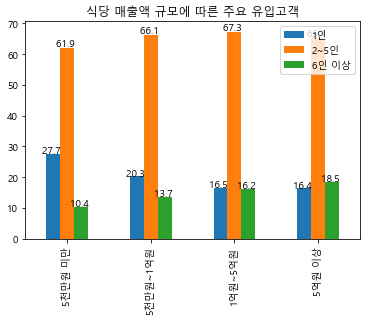

In [5]:
customer_num = df.iloc[27:,13:]
customer_num.columns = ['1인', '2~5인', '6인 이상']
customer_num.index = ['5천만원 미만', '5천만원~1억원', '1억원~5억원', '5억원 이상']
customer_num = customer_num.astype('float')
plot = customer_num.plot(kind='bar', title='식당 매출액 규모에 따른 주요 유입고객')

plt.rc('font', family='Malgun Gothic')
for p in  plot.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plot.annotate("%.1f "%(height)   # 높이에 해당하는 값을
                  , (left+width/2, height*1.01)  # 이 좌표에
                  , ha='center')  # 중심축 가운데로 해서 찍어줘라

In [6]:
전체 = df.loc[df.index=='전체'].set_index('특성별(2)').drop(['특성별(3)','특성별(4)'],axis = 'columns')
전체 = 전체.transpose()
전체.index.name = ''

전체.loc['1인':'6인 이상'].plot(kind='bar', title = '외식 고객의 단체 손님 비율')

KeyError: '1인'